# Analyzing Google reviews for Madurai Cafe

### In this notebook, we perform sentiment analysis on the Google reviews for [Madurai Cafe](https://www.google.com/search?cs=1&output=search&q=Madurai+Cafe&ludocid=8523820750040648972&gsas=1&client=ms-android-oneplus-rvo3&lsig=AB86z5Vli_fodO2CKkbOXhNkj__F&kgs=91bdaa24ce60c431&shndl=-1&source=sh/x/kp/local/2) to identify areas that the restaurant performs really well in, and areas that could be improved, as seen through the eyes of the customer.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('MaduraiCafe_Reviews.csv')

In [3]:
df1.head()

,isLocalGuide,name,ReviewDate,MealType,ServiceType,AtmosphereRating,FoodRating,ServiceRating,Rating,review
0,True,Divyan Paul,07-05-2023,Dinner,Dine in,NaN,NaN,NaN,5,NaN
1,True,Pakala Purushotham,06-05-2023,Dinner,Dine in,5.0,5.0,5.0,5,NaN
2,True,Dhanush Pai,06-05-2023,Dinner,Dine in,4.0,5.0,5.0,5,Went with friends and had many items. It was y...
3,True,Jibin Mathai,30-04-2023,Dinner,Take out,3.0,4.0,5.0,4,NaN
4,True,hari prasad,30-04-2023,Lunch,Dine in,4.0,4.0,5.0,5,"The food was good, the atmosphere like same as..."


In [4]:
df1.describe()

,AtmosphereRating,FoodRating,ServiceRating,Rating
count,54.000000,59.000000,57.000000,1368.000000
mean,3.703704,4.288136,4.298246,4.434211
std,1.175691,1.114959,1.117473,0.917233
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,4.000000,4.000000
50%,4.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


![Ratings_small](Ratings_small.png)

#### The above image shows the overall average rating, and the average rating for food, service, and atmosphere.

### Word Cloud:

![wordcloud](wordcloud.png)

## Natural Language Processing with nltk

In [5]:
df1 = df1[['review']]

# Removing columns without text
df1.dropna(inplace=True)
df1.reset_index(inplace=True, drop=True)
df1

,review
0,Went with friends and had many items. It was y...
1,"The food was good, the atmosphere like same as..."
2,Can have authentic South Indian food in a good...
3,Super tasty parotas ever in hyderabad my tummy...
4,Namba style hotel.
...,...
470,Hygienic very tasty
471,Tastey and hygiene hotel.. Very humble servic...
472,Very good tamilnadu​ food with low price.. Goo...
473,Great tamil food


### Data Cleaning

#### Tokenization:

We split each review into individual words or phrases, so that we may be able to analyze the text at a more granular level.

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df1['tokenized_review'] = df1['review'].apply(lambda x: word_tokenize(x))
df1.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,tokenized_review
0,Went with friends and had many items. It was y...,"[Went, with, friends, and, had, many, items, ...."
1,"The food was good, the atmosphere like same as...","[The, food, was, good, ,, the, atmosphere, lik..."
2,Can have authentic South Indian food in a good...,"[Can, have, authentic, South, Indian, food, in..."
3,Super tasty parotas ever in hyderabad my tummy...,"[Super, tasty, parotas, ever, in, hyderabad, m..."
4,Namba style hotel.,"[Namba, style, hotel, .]"


#### Removing unnecessary characters:

We remove unnecessary characters like punctutations, special characters, and numbers.

In [7]:
import re
import string

def clean_text(tokens):
    cleaned_tokens = []
    for token in tokens:
        # remove any punctuation from the token
        token = token.translate(str.maketrans('', '', string.punctuation))
        # remove any non-alphabetic characters from the token
        token = re.sub('[^A-Za-z]+', '', token)
        # convert the token to lowercase
        token = token.lower()
        cleaned_tokens.append(token)
    return cleaned_tokens

df1['cleaned_review'] = df1['tokenized_review'].apply(lambda x: clean_text(x))

df1.head()

,review,tokenized_review,cleaned_review
0,Went with friends and had many items. It was y...,"[Went, with, friends, and, had, many, items, ....","[went, with, friends, and, had, many, items, ,..."
1,"The food was good, the atmosphere like same as...","[The, food, was, good, ,, the, atmosphere, lik...","[the, food, was, good, , the, atmosphere, like..."
2,Can have authentic South Indian food in a good...,"[Can, have, authentic, South, Indian, food, in...","[can, have, authentic, south, indian, food, in..."
3,Super tasty parotas ever in hyderabad my tummy...,"[Super, tasty, parotas, ever, in, hyderabad, m...","[super, tasty, parotas, ever, in, hyderabad, m..."
4,Namba style hotel.,"[Namba, style, hotel, .]","[namba, style, hotel, ]"


#### Removing stopwords:

Stopwords are common words that don't add much meaning to the sentiment. We remove them from the cleaned reviews.

In [8]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Define a function to remove stop words from a list of tokens
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply the remove_stopwords function to the cleaned_comment column
df1['stopword_removed'] = df1['cleaned_review'].apply(remove_stopwords)
df1.head()

,review,tokenized_review,cleaned_review,stopword_removed
0,Went with friends and had many items. It was y...,"[Went, with, friends, and, had, many, items, ....","[went, with, friends, and, had, many, items, ,...","[went, friends, many, items, , yummy, , kothu,..."
1,"The food was good, the atmosphere like same as...","[The, food, was, good, ,, the, atmosphere, lik...","[the, food, was, good, , the, atmosphere, like...","[food, good, , atmosphere, like, roadside, sho..."
2,Can have authentic South Indian food in a good...,"[Can, have, authentic, South, Indian, food, in...","[can, have, authentic, south, indian, food, in...","[authentic, south, indian, food, good, setting..."
3,Super tasty parotas ever in hyderabad my tummy...,"[Super, tasty, parotas, ever, in, hyderabad, m...","[super, tasty, parotas, ever, in, hyderabad, m...","[super, tasty, parotas, ever, hyderabad, tummy..."
4,Namba style hotel.,"[Namba, style, hotel, .]","[namba, style, hotel, ]","[namba, style, hotel, ]"


#### Stemming:

We convert each word to it's root form.

In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df1['stemmed_review'] = df1['stopword_removed'].apply(lambda x: [stemmer.stem(word) for word in x])
df1.head()

,review,tokenized_review,cleaned_review,stopword_removed,stemmed_review
0,Went with friends and had many items. It was y...,"[Went, with, friends, and, had, many, items, ....","[went, with, friends, and, had, many, items, ,...","[went, friends, many, items, , yummy, , kothu,...","[went, friend, mani, item, , yummi, , kothu, p..."
1,"The food was good, the atmosphere like same as...","[The, food, was, good, ,, the, atmosphere, lik...","[the, food, was, good, , the, atmosphere, like...","[food, good, , atmosphere, like, roadside, sho...","[food, good, , atmospher, like, roadsid, shop,..."
2,Can have authentic South Indian food in a good...,"[Can, have, authentic, South, Indian, food, in...","[can, have, authentic, south, indian, food, in...","[authentic, south, indian, food, good, setting...","[authent, south, indian, food, good, set, , mu..."
3,Super tasty parotas ever in hyderabad my tummy...,"[Super, tasty, parotas, ever, in, hyderabad, m...","[super, tasty, parotas, ever, in, hyderabad, m...","[super, tasty, parotas, ever, hyderabad, tummy...","[super, tasti, parota, ever, hyderabad, tummi,..."
4,Namba style hotel.,"[Namba, style, hotel, .]","[namba, style, hotel, ]","[namba, style, hotel, ]","[namba, style, hotel, ]"


### Sentiment Analysis of all the reviews

We will be using the 'stemmed_review' column to do our analysis.

In [10]:
df = df1.iloc[:,-1:] 
df['stemmed_review'] = df['stemmed_review'].apply(lambda x: ' '.join(x))
df.head()
df.to_csv('stemmed_reviews.csv', index=False)

#### We will now use the SentimentIntensityAnalyzer from nltk to do a sentiment analysis:

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_review'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head()

,stemmed_review,neg,neu,pos,compound
0,went friend mani item yummi kothu parotha ch...,0.0,0.758,0.242,0.4939
1,food good atmospher like roadsid shop madurai...,0.0,0.444,0.556,0.9100
2,authent south indian food good set must visit,0.0,0.707,0.293,0.4404
3,super tasti parota ever hyderabad tummi full ever,0.0,0.642,0.358,0.5994
4,namba style hotel,0.0,1.000,0.000,0.0000


Here, the 'neg', 'neu', and 'pos' columns give us the negative, neutral, and positive sentiment scores respectively. <br>
The 'compound' column gives the overall sentiment score in a range of -1 to 1, where -1 is extremely negative and 1 is extremely positive.<br>
The compound score takes into consideration the polarity and intensity, and normalises them to get the score.

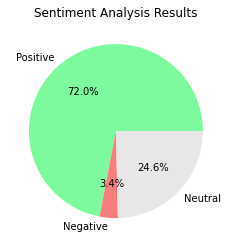

In [12]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

#### The overall sentiment is positive, and around a quarter of the reviews are neutral.

In [13]:
df.describe()

,neg,neu,pos,compound
count,475.000000,475.000000,475.000000,475.000000
mean,0.019232,0.606611,0.374160,0.397016
std,0.095999,0.319354,0.321048,0.327292
min,0.000000,0.000000,0.000000,-0.659700
25%,0.000000,0.369000,0.000000,0.000000
50%,0.000000,0.633000,0.344000,0.440400
75%,0.000000,0.891000,0.592000,0.636900
max,1.000000,1.000000,1.000000,0.972900


#### The mean of the 'neg' column is 0.019 and the median is 0.000, and the standard deviation is 0.096. The negative sentiment is quite low.
#### The mean of the 'neu' column is 0.607, the median is 0.633, and the standard deviation is 0.320. There is a high sentiment of neutrality, with moderate deviation.
#### The mean and median of the 'pos' column are 0.397 and 0.440, and the standard deviation is 0.327. This shows that reviews lean quite a bit to the positive side, with moderate deviation.

#### The 'compound' column has a mean of 0.397 and a median of 0.440, which tells us that the overall sentiment of the comment thread is positive. The standard deviation is 0.327, which shows that the sentiments are varied.

### Sentiment Analysis of all the reviews that mention food

In [14]:
df = pd.read_csv('stemmed_reviews_food.csv')

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_review'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head()

,stemmed_review,neg,neu,pos,compound
0,food good atmospher like roadsid shop madurai...,0.000,0.444,0.556,0.9100
1,authent south indian food good set must visit,0.000,0.707,0.293,0.4404
2,got food poison food place use amaz year r...,0.171,0.688,0.141,-0.3818
3,almost daili visit best food,0.000,0.504,0.496,0.6041
4,tast local tamilnadu street food authent tast ...,0.055,0.769,0.176,0.5994


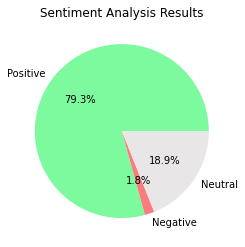

In [16]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

#### The overall sentiment is positive.

In [17]:
df.describe()

,neg,neu,pos,compound
count,222.000000,222.000000,222.000000,222.000000
mean,0.008748,0.640982,0.350266,0.480110
std,0.041524,0.248852,0.250244,0.321685
min,0.000000,0.192000,0.000000,-0.659700
25%,0.000000,0.443250,0.164500,0.361200
50%,0.000000,0.656000,0.341000,0.449600
75%,0.000000,0.811750,0.543500,0.700300
max,0.368000,1.000000,0.808000,0.972900


#### The mean of the 'neg' column is 0.009 and the median is 0.000, and the standard deviation is 0.042. The negative sentiment is very low, with low variation.
#### The mean of the 'neu' column is 0.641, the median is 0.656, and the standard deviation is 0.249. There is a high sentiment of neutrality, with moderate deviation.
#### The mean and median of the 'pos' column are 0.350 and 0.341, and the standard deviation is 0.250. This shows that reviews lean quite a bit to the positive side, with moderate deviation.

#### The 'compound' column has a mean of 0.480 and a median of 0.450, which tells us that the overall sentiment of the comment thread is positive. The standard deviation is 0.322, which shows that the sentiments are varied.

### Sentiment Analysis of all the reviews that mention taste

In [18]:
df = pd.read_csv('stemmed_reviews_taste.csv')

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_review'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head()

,stemmed_review,neg,neu,pos,compound
0,super tasti parota ever hyderabad tummi full ever,0.000,0.642,0.358,0.5994
1,great tast authent tamilnadu dinner item briy...,0.000,0.594,0.406,0.6249
2,tast local tamilnadu street food authent tast ...,0.055,0.769,0.176,0.5994
3,nice place tamil nadu dish tast authent combin...,0.000,0.674,0.326,0.7003
4,ca nt say authent tamil cuisin better tamil h...,0.000,0.674,0.326,0.7003


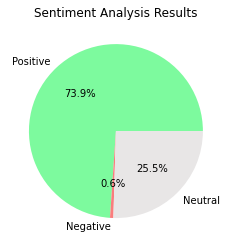

In [20]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

#### The overall sentiment is positive, and around a quarter of the reviews are neutral.

In [21]:
df.describe()

,neg,neu,pos,compound
count,161.000000,161.000000,161.000000,161.000000
mean,0.009161,0.703211,0.287640,0.451434
std,0.035497,0.238382,0.236759,0.319520
min,0.000000,0.192000,0.000000,-0.051600
25%,0.000000,0.530000,0.000000,0.000000
50%,0.000000,0.732000,0.262000,0.440400
75%,0.000000,1.000000,0.455000,0.700300
max,0.310000,1.000000,0.808000,0.965200


#### The mean of the 'neg' column is 0.009, the median is 0.000, and the standard deviation is 0.035. The negative sentiment is very low, with low variation.
#### The mean of the 'neu' column is 0.703, the median is 0.732, and the standard deviation is 0.238. There is a high sentiment of neutrality, with moderate deviation.
#### The mean and median of the 'pos' column are 0.288 and 0.262 respectively, and the standard deviation is 0.237. This shows that reviews lean quite a bit to the positive side, with moderate deviation.

#### The 'compound' column has a mean of 0.451 and a median of 0.440, which tells us that the overall sentiment of the comment thread is positive. The standard deviation is 0.320, which shows that the sentiments are varied.

### Sentiment Analysis of all the reviews that mention ambience

In [31]:
df = pd.read_csv('stemmed_reviews_ambience.csv')

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_review'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head()

,stemmed_review,neg,neu,pos,compound
0,person favorit whole citi hyderabad visit pla...,0.068,0.845,0.087,0.2278
1,food good ambienc worth,0.000,0.294,0.706,0.5859
2,awesom food varieti great tast ambienc great ...,0.000,0.395,0.605,0.8934
3,wonder delicaci madhurai love food made amaz ...,0.038,0.706,0.256,0.8834
4,nice littl place lack ambienc make great fri...,0.120,0.366,0.513,0.8176


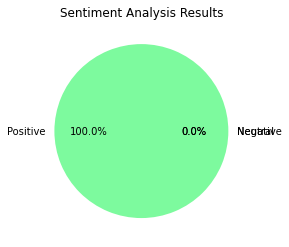

In [33]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

#### The overall sentiment is extremely positive, with 0 neutral or negative reviews

In [34]:
df.describe()

,neg,neu,pos,compound
count,6.000000,6.000000,6.000000,6.000000
mean,0.055333,0.562000,0.382500,0.589350
std,0.051640,0.236884,0.260492,0.338994
min,0.000000,0.294000,0.087000,0.128000
25%,0.009500,0.373250,0.160000,0.317325
50%,0.053000,0.550500,0.384500,0.701750
75%,0.096500,0.751000,0.582000,0.866950
max,0.120000,0.845000,0.706000,0.893400


#### The mean of the 'neg' column is 0.056, the median is 0.053, and the standard deviation is 0.052. The negative sentiment is very low, with low variation, but higher than the negative sentiment for the food and taste reviews.
#### The mean of the 'neu' column is 0.562, the median is 0.550, and the standard deviation is 0.237. There is a high sentiment of neutrality, with moderate deviation.
#### The mean and median of the 'pos' column are 0.382 and 0.384 respectively, and the standard deviation is 0.260. The reviews lean quite a bit to the positive side, and there is moderate variation in the positive sentiment.

#### The 'compound' column has a mean of 0.589 and a median of 0.702, which tells us that the overall sentiment of the comment thread is very positive. The standard deviation is 0.589, which shows that the sentiments are very varied.

#### The reviews:

- My personal favorite in the whole city of Hyderabad. Visit this place thrice a week, at the least. Not a great ambience to dine-in, but a fabulous eatery that serves Chicken Biryani (made of jeeraga samba rice, should typically be called pulao), Chicken Sukka Biryani, Mutton Sukka Biryani, Mutton Dilli (hardened blood), Kalakki, Ceylon paratha, chicken khari dosa etc. The Best!!
- Food is good but ambience is not worth.
- Awesome food varieties with great taste. Ambience is not that great, so would recommend to takeaway.
- "This is such a wonderful Delicacy from Madhurai, loved having such a food made of amazing flavorful masala, Samba Mutton Biryani, Chukka Mutton, Sankara fish fry, Nannari we're the best!!
Missed kotthparata, it's on my list yet...
Happy to have such a yummm Madhurai delicacy in Hyderabad kondapur!
(Not recommended for people who only go by restaurant ambience)"
- Nice little place. What it lacks in ambience,  it makes up in great friendly staff and good food.
- Excellent place for veg and non veg items. Don't expect hi fi ambience its usual mess sort of hotel. But taste is awesome, typical madurai style.


#### There are only six reviews that mentioned ambience. The reviews say that the ambience is not great, but that did not mar the customers' satisfaction, as the restaurant made up for it in other areas. That made the overall review positive, but the ambience is something that could be improved.

### Sentiment Analysis of all the reviews that mention hygiene

In [35]:
df = pd.read_csv('stemmed_reviews_hygiene.csv')

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_review'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head()

,stemmed_review,neg,neu,pos,compound
0,got food poison food place use amaz year r...,0.171,0.688,0.141,-0.3818
1,nice place tamil nadu dish tast authent combin...,0.000,0.674,0.326,0.7003
2,nice food experi realli enjoy breakfast vari...,0.000,0.677,0.323,0.9729
3,samba chicken biryani chicken sukha biryani t...,0.000,0.803,0.197,0.4019
4,good food unhygien locat,0.000,0.508,0.492,0.4404


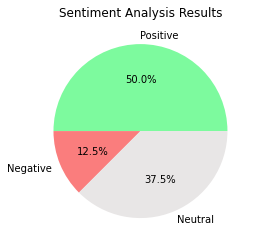

In [37]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

#### Only half the reviews mentioning hygiene have a positive sentiment.

In [38]:
df.describe()

,neg,neu,pos,compound
count,8.000000,8.000000,8.000000,8.000000
mean,0.021375,0.793750,0.184875,0.266713
std,0.060458,0.188418,0.184363,0.442253
min,0.000000,0.508000,0.000000,-0.381800
25%,0.000000,0.676250,0.000000,0.000000
50%,0.000000,0.745500,0.169000,0.200950
75%,0.000000,1.000000,0.323750,0.505375
max,0.171000,1.000000,0.492000,0.972900


#### The mean of the 'neg' column is 0.021, the median is 0.000, and the standard deviation is 0.060. The negative sentiment is very low, with low variation.
#### The mean of the 'neu' column is 0.794, the median is 0.746, and the standard deviation is 0.188. There is a high sentiment of neutrality, with low-moderate deviation.
#### The mean and median of the 'pos' column are 0.185 and 0.169 respectively, and the standard deviation is 0.184. The reviews lean  to the positive side, and there is moderate variation in the positive sentiment.

#### The 'compound' column has a mean of 0.266 and a median of 0.201, which tells us that the overall sentiment of the comment thread is slightly positive. The standard deviation is 0.267, which shows that the sentiments are a little varied.

### Sentiment Analysis of all the reviews that mention service

In [39]:
df = pd.read_csv('stemmed_reviews_service.csv')

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df.loc[:, 'sentiment_scores'] = df['stemmed_review'].apply(sia.polarity_scores)

df = pd.concat([df.drop(['sentiment_scores'], axis=1), df['sentiment_scores'].apply(pd.Series)], axis=1)
df.head()

,stemmed_review,neg,neu,pos,compound
0,food good atmospher like roadsid shop madurai...,0.000,0.444,0.556,0.9100
1,good authent tamil food avail place easi loca...,0.000,0.632,0.368,0.9153
2,nice place tamil nadu dish tast authent combin...,0.000,0.674,0.326,0.7003
3,food serv plastic coat plate cup one star se...,0.206,0.794,0.000,-0.6597
4,typic madurai tamilnadu type food love authe...,0.000,0.656,0.344,0.6369


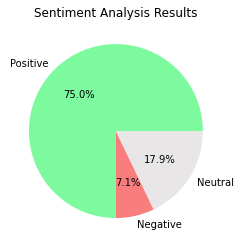

In [41]:
import matplotlib.pyplot as plt

positive = len(df[df['compound'] > 0])
negative = len(df[df['compound'] < 0])
neutral = len(df[df['compound'] == 0])

plt.pie([positive, negative, neutral], labels=['Positive', 'Negative', 'Neutral'], 
        autopct='%1.1f%%', colors=['#7dfa9e', '#fa7d7d', '#e8e6e6'])
plt.title('Sentiment Analysis Results')
plt.show()

#### The overall sentiment is positive.

In [42]:
df.describe()

,neg,neu,pos,compound
count,28.000000,28.000000,28.000000,28.000000
mean,0.026036,0.711000,0.263000,0.524386
std,0.069983,0.204855,0.202652,0.423284
min,0.000000,0.341000,0.000000,-0.659700
25%,0.000000,0.587750,0.120750,0.170850
50%,0.000000,0.747000,0.253000,0.700300
75%,0.000000,0.830000,0.374250,0.863325
max,0.310000,1.000000,0.659000,0.964300


#### The mean of the 'neg' column is 0.026, the median is 0.000, and the standard deviation is 0.070. The negative sentiment is very low, with very low variation.
#### The mean of the 'neu' column is 0.711, the median is 0.747, and the standard deviation is 0.205. There is a very high sentiment of neutrality, with low-moderate deviation.
#### The mean and median of the 'pos' column are 0.263 and 0.253 respectively, and the standard deviation is 0.203. The reviews lean  to the positive side, and there is low-moderate variation in the positive sentiment.

#### The 'compound' column has a mean of 0.524 and a median of 0.700, which tells us that the overall sentiment of the comment thread is very positive. The standard deviation is 0.423, which shows that the positive sentiments are quite varied.

# Conclusions

#### The reviews had a high sentiment of neutrality, a moderate sentiment of positivity, and a very low sentiment of negativity. 
#### This made the overall sentiment positive for most of the reviews.

#### 72% of the reviews were positive, and only 3.4% were negative. 

#### 79.3% of the reviews that mentioned food were positive, and only 1.8% were negative. 

#### 73.9% of the reviews that mentioned taste were positive, and only 0.6% were negative. 

#### 100% of the reviews that mentioned ambience were positive, but looking at the individual comments leads us to the conclusion that the ambience by itself was not good, and the positive reviews were only due to other aspects.
### The ambience is something that could be improved.

#### Only 50% of the reviews that mentioned hygiene were positive, with 12.5% of the reviews being negative.
### The hygiene is something that could be improved.

#### 75% of the reviews that mentioned service were positive, and 7.1% were negative. 
### The negative percentage is slightly high, and service is something that can be improved.